In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import scipy.interpolate as inter
from scipy.special import erf

In [22]:
phase_s, wavelength_salt, flux_salt = np.loadtxt('../data/info_files/SALT/salt2-4/salt2_template_0.dat', unpack = True)
phase_s_corr, wavelength_salt_corr, salt_corr = np.loadtxt('../data/info_files/SALT/salt2-4/salt2_template_1.dat', unpack = True)
flux_salt_m2 = flux_salt - 2.*salt_corr
flux_salt_p1 = flux_salt + 1.*salt_corr

In [25]:
salt_temps_m2 = {}
phase_list = []
first = True
for i, phase in enumerate(phase_s):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            salt_temps_m2[float(phase_s[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_salt[i]]
        temp_flux = [flux_salt_m2[i]]
    else:
        temp_wave.append(wavelength_salt[i])
        temp_flux.append(flux_salt_m2[i])
    first = False
    
salt_temps_p1 = {}
phase_list = []
first = True
for i, phase in enumerate(phase_s):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            salt_temps_p1[float(phase_s[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_salt[i]]
        temp_flux = [flux_salt_p1[i]]
    else:
        temp_wave.append(wavelength_salt[i])
        temp_flux.append(flux_salt_p1[i])
    first = False

In [26]:
def make_obj_from_template(wave, flux):
    wave_s = wave
    flux_s = flux
    wave_interp_s = np.arange(1000., 12000., dtype=int, step=2)
    flux_spl_s = inter.splrep(wave_s, flux_s)
    flux_interp_s = inter.splev(wave_interp_s, flux_spl_s, ext = 3)
    s_template = composite.supernova(wave_interp_s, flux_interp_s)
    s_template.phase_array = np.zeros(len(flux_interp_s))
    return s_template

In [27]:
m2_salt_template = make_obj_from_template(salt_temps_m2[0.][0], salt_temps_m2[0.][1])
p1_salt_template = make_obj_from_template(salt_temps_p1[0.][0], salt_temps_p1[0.][1])

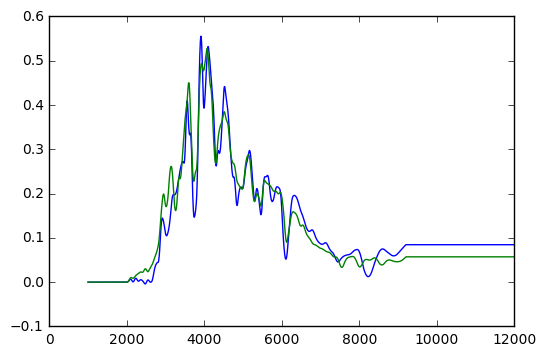

In [29]:
plt.plot(m2_salt_template.wavelength, m2_salt_template.flux)
plt.plot(p05_salt_template.wavelength, p1_salt_template.flux)
plt.show()

In [30]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'"]

In [35]:
composites_p05, sn_arrays_p05, boot_sn_arrays_p05 = query_db.main(len(query), query, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -1 and phase <= 1 and ((dm15_source <= .9) or (dm15_from_fits <= .9)) and Supernovae.SN !='2002bf'
159 questionable files currently ignored
0 questionable spectra removed 23 spectra left
0 Peculiar Ias removed 23 spectra left
23 spectra with host corrections
159 questionable files currently ignored
15 valid SNe found
Arrays cleaned
15 spectra may have telluric contamination
1998es sn1998es-19981125-ui-corrected.flm 69.1436677309 0.85 None 0.496750833938 0.010567 bsnip 3346.0 10044.0 8.0
Host correction...
1999aa sn1999aa-19990223-ui.flm 44.0459361476 0.78 None 0.460351148368 0.014443 bsnip 3344.0 10350.0 14.0
Host correction...
2001cp sn2001cp-20010629-ui.flm 24.0178237234 0.88 None 0.917447344588 0.022402 bsnip 3278.0 10124.0 13.0
Host correction...
2005eq sn2005eq-20051011.376-ui-corrected.flm 37.8569772533 0.88 None 0.0310988486616 0.028977 bsnip 3278.0 10156.0 15.0
Host correct

In [36]:
query_db.set_min_num_spec(composites_p05, 5)

In [58]:
comps_and_temps = []
for comp in composites_p05:
    comps_and_temps.append(comp)
comps_and_temps.append(p05_salt_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

0.841709141721
[-0.4, -0.30000000000000004, -0.2, -0.09999999999999998, 0.0, 0.09999999999999998, 0.20000000000000007, '', 0.4]


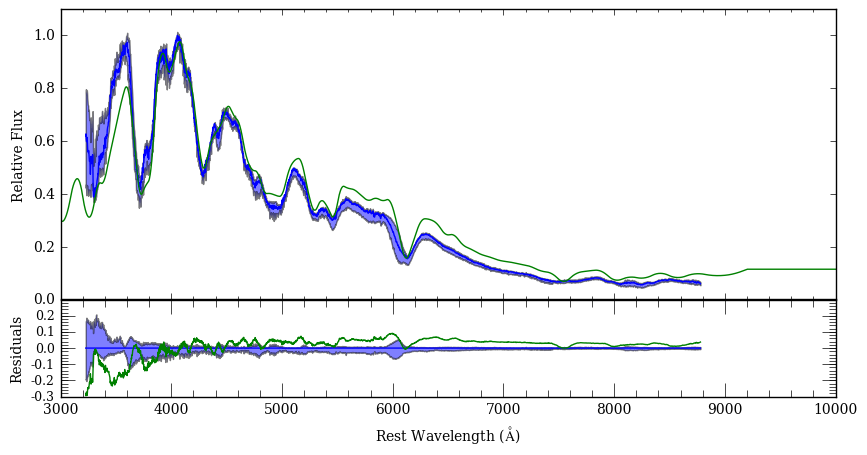

In [59]:
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]])

In [52]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.3 and dm15_source < 1.5) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.5)) and Supernovae.SN !='2002bf'"]

In [53]:
composites_m2, sn_arrays_m2, boot_sn_arrays_m2 = query_db.main(len(query), query, boot='b', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.3 and dm15_source < 1.5) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.5)) and Supernovae.SN !='2002bf'
159 questionable files currently ignored
1 questionable spectra removed 74 spectra left
0 Peculiar Ias removed 74 spectra left
66 spectra with host corrections
159 questionable files currently ignored
20 valid SNe found
Arrays cleaned
2 spectra may have telluric contamination
2001ep sn2001ep-20011020-ui-corrected.flm 50.8449098727 1.3 None 2.68475189241 0.013129 bsnip 3308.0 10216.0 12.0
Host correction...
2002he sn2002he-20021108-br.flm 70.9263350618 1.44 None 0.0575854705037 0.024564 bsnip 3048.0 9150.0 1.0
Host correction...
2003u sn2003U-20030204-ui.flm 29.2694201484 1.46 None -2.67712752871 0.028341 bsnip 3068.0 10064.0 15.0
Host correction...
2004gs sn2004gs-20041217.447-ui-corrected.flm 28.3734591732 1.41 None 1.41616176363 0.027

In [54]:
query_db.set_min_num_spec(composites_m2, 1)

In [55]:
comps_and_temps = []
for comp in composites_m2:
    comps_and_temps.append(comp)
comps_and_temps.append(m2_salt_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[1], True)

1.372598839


query_db.py:474: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  comp.low_conf = norm*comp.low_conf
query_db.py:475: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  comp.up_conf = norm*comp.up_conf


[-0.2, -0.15000000000000002, -0.1, -0.04999999999999999, 0.0, 0.04999999999999999, 0.10000000000000003, '', 0.2]


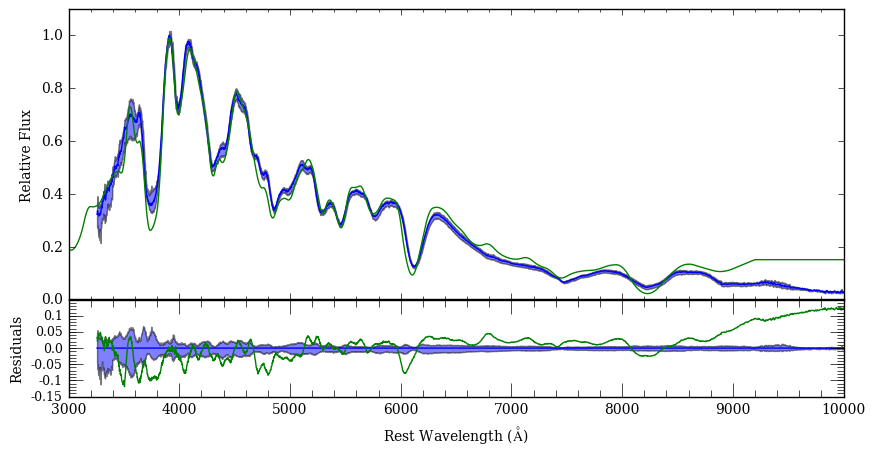

In [57]:
print np.average(comps_and_temps[0].dm15_array[comps_and_temps[0].x1:comps_and_temps[0].x2])
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]])

## Warp Hsiao Templates

In [157]:
phase_h, wavelength_hsiao, flux_hsiao = np.loadtxt('../data/info_files/hsiao_template.dat', unpack = True)

In [158]:
hsiao_temps = {}
phase_list = []
first = True
for i, phase in enumerate(phase_h):
    if phase not in phase_list:
        phase_list.append(phase)
        if not first:
            hsiao_temps[float(phase_h[i-1])] = [temp_wave, temp_flux]
        temp_wave = [wavelength_hsiao[i]]
        temp_flux = [flux_hsiao[i]]
    else:
        temp_wave.append(wavelength_hsiao[i])
        temp_flux.append(flux_hsiao[i])
    first = False

In [159]:
import pyphot
import scipy.interpolate as inter
import scipy.optimize as opt

In [193]:
def color_residuals(spline_knot_vals, true_BmV, true_VmR, spectrum, Beff = 4315.522317, Veff = 5438.689405, Reff = 6389.952199):
    print spline_knot_vals
    spline_knot_locs = [Beff, Veff, Reff]
    spline = inter.splrep(spline_knot_locs, spline_knot_vals, k=2)
    spline_func = inter.splev(hsiao_max[0], spline, ext = 0)
    warped_flux = spline_func*spectrum[1]

    Bflux = B.get_flux(np.asarray(hsiao_max[0]), np.asarray(warped_flux), axis = -1)
    Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag

    Vflux = V.get_flux(np.asarray(hsiao_max[0]), np.asarray(warped_flux), axis = -1)
    Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag

    Rflux = R.get_flux(np.asarray(hsiao_max[0]), np.asarray(warped_flux), axis = -1)
    Rmag = -2.5 * np.log10(Rflux) - R.Vega_zero_mag
    
    new_BmV = Bmag - Vmag
    new_VmR = Vmag - Rmag
    
    return (new_BmV - true_BmV)**2. + (new_VmR - true_VmR)**2.
#     return (new_BmV - true_BmV)**2.

In [161]:
lib = pyphot.get_library()
f = lib.find('Johnson')
# for name in f:
#     lib[name].info(show_zeropoints=True)
U = lib['GROUND_JOHNSON_U']
B = lib['GROUND_JOHNSON_B']
V = lib['GROUND_JOHNSON_V']
R = lib['GROUND_COUSINS_R']

In [162]:
phase = 0.
hsiao_max = hsiao_temps[phase]
# Bflux = B.get_flux(np.asarray(hsiao_max[0]), np.asarray(hsiao_max[1]), axis = -1)
# Vflux = V.get_flux(np.asarray(hsiao_max[0]), np.asarray(hsiao_max[1]), axis = -1)
# Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag
# Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag

In [179]:
# Ueff = 3709.279027
Beff = 4315.522317
Veff = 5438.689405
Reff = 6389.952199
spline_knot_locs = [Beff, Veff, Reff]
spline_knot_vals = [1.00000001, 1.0, 1.0]
spline = inter.splrep(spline_knot_locs, spline_knot_vals, k=2)
spline_func = inter.splev(hsiao_max[0], spline, ext = 0)

[ 1.0000001   1.0000001   1.0000001   1.0000001   1.0000001   1.0000001
  1.0000001   1.0000001   1.0000001   1.0000001   1.0000001   1.0000001
  1.0000001   1.0000001   1.0000001   1.0000001   1.0000001   1.0000001
  1.0000001   1.00000009  1.00000009  1.00000009  1.00000009  1.00000009
  1.00000009  1.00000009  1.00000009  1.00000009  1.00000009  1.00000009
  1.00000009  1.00000009  1.00000009  1.00000009  1.00000009  1.00000009
  1.00000009  1.00000009  1.00000009  1.00000009  1.00000009  1.00000009
  1.00000009  1.00000009  1.00000008  1.00000008  1.00000008  1.00000008
  1.00000008  1.00000008  1.00000008  1.00000008  1.00000008  1.00000008
  1.00000008  1.00000008  1.00000008  1.00000008  1.00000008  1.00000008
  1.00000008  1.00000008  1.00000008  1.00000008  1.00000008  1.00000008
  1.00000008  1.00000008  1.00000008  1.00000008  1.00000008  1.00000007
  1.00000007  1.00000007  1.00000007  1.00000007  1.00000007  1.00000007
  1.00000007  1.00000007  1.00000007  1.00000007  1.00

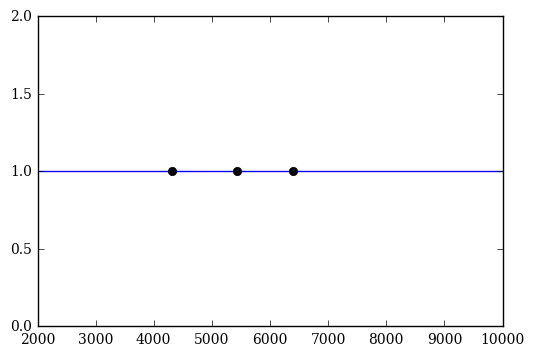

In [164]:
plt.plot(hsiao_max[0], spline_func)
plt.plot(spline_knot_locs, spline_knot_vals, 'ko')
plt.xlim([2000,10000])
plt.ylim([0,2])
plt.show()

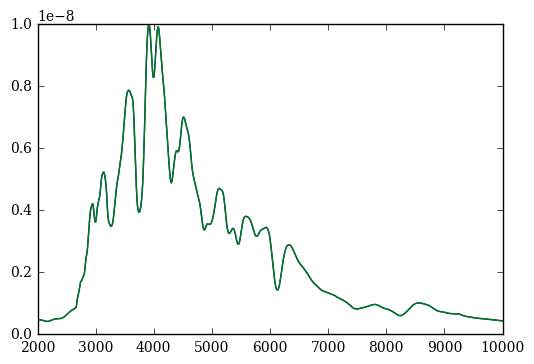

In [165]:
warped_hsiao = spline_func*hsiao_max[1]
plt.plot(hsiao_max[0], hsiao_max[1])
plt.plot(hsiao_max[0], warped_hsiao)
plt.xlim([2000,10000])
plt.show()

In [166]:
Bflux = B.get_flux(np.asarray(hsiao_max[0]), np.asarray(hsiao_max[1]), axis = -1)
Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag

Vflux = V.get_flux(np.asarray(hsiao_max[0]), np.asarray(hsiao_max[1]), axis = -1)
Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag

Rflux = R.get_flux(np.asarray(hsiao_max[0]), np.asarray(hsiao_max[1]), axis = -1)
Rmag = -2.5 * np.log10(Rflux) - R.Vega_zero_mag

print Bmag, Vmag, Rmag
print Bmag - Vmag, Vmag - Rmag

Bflux = B.get_flux(np.asarray(hsiao_max[0]), np.asarray(warped_hsiao), axis = -1)
Bmag = -2.5 * np.log10(Bflux) - B.Vega_zero_mag

Vflux = V.get_flux(np.asarray(hsiao_max[0]), np.asarray(warped_hsiao), axis = -1)
Vmag = -2.5 * np.log10(Vflux) - V.Vega_zero_mag

Rflux = R.get_flux(np.asarray(hsiao_max[0]), np.asarray(warped_hsiao), axis = -1)
Rmag = -2.5 * np.log10(Rflux) - R.Vega_zero_mag

print Bmag - Vmag, Vmag - Rmag

-0.0371200866077 0.0423958457655 0.0355232036651
-0.0795159323732 0.00687264210036
-0.079515943888 0.00687264266107


In [167]:
comp = composites_p05[0]

true_Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
true_Bmag = -2.5 * np.log10(true_Bflux) - B.Vega_zero_mag

true_Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
true_Vmag = -2.5 * np.log10(true_Vflux) - V.Vega_zero_mag

true_Rflux = R.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
true_Rmag = -2.5 * np.log10(true_Rflux) - R.Vega_zero_mag

In [168]:
print true_Bmag, true_Vmag, true_Rmag

-20.0588637373 -19.9481258541 -19.8456528487


In [169]:
true_BmV = true_Bmag - true_Vmag
true_VmR = true_Vmag - true_Rmag

In [185]:
best_knots = opt.minimize(color_residuals, spline_knot_vals, args = (true_BmV, true_VmR, hsiao_max), method = 'Nelder-Mead').x
print best_knots

[ 1.00000001  1.          1.        ]
-0.079515943888 0.00687264266107
-0.110737883249 -0.102473005413
[ 1.05000001  1.          1.        ]
-0.135497477458 0.00966655441418
-0.110737883249 -0.102473005413
[ 1.00000001  1.05        1.        ]
-0.0221791626868 -0.0479932773108
-0.110737883249 -0.102473005413
[ 1.00000001  1.          1.05      ]
-0.0802701495813 0.0585216073775
-0.110737883249 -0.102473005413
[ 1.03333334  1.03333333  0.95      ]
-0.0782875049926 -0.0828109201571
-0.110737883249 -0.102473005413
[ 1.05000001  1.05        0.9       ]
-0.0773296001607 -0.158197606426
-0.110737883249 -0.102473005413
[ 0.97222223  1.05555556  0.96666667]
0.0177444303647 -0.0921970484384
-0.110737883249 -0.102473005413
[ 1.03055557  1.01388889  0.99166667]
-0.0979693385229 -0.0157231152799
-0.110737883249 -0.102473005413
[ 1.0425926   1.06481481  0.96111111]
-0.0535081963668 -0.10394162828
-0.110737883249 -0.102473005413
[ 1.07098767  1.02469136  0.93518519]
-0.129263552919 -0.0876792394513


In [186]:
best_spline = inter.splrep(spline_knot_locs, best_knots, k=2)
best_spline_func = inter.splev(hsiao_max[0], best_spline, ext = 0)

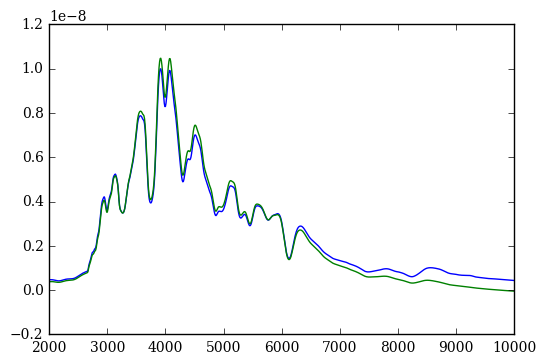

In [187]:
warped_hsiao = best_spline_func*hsiao_max[1]
plt.plot(hsiao_max[0], hsiao_max[1])
plt.plot(hsiao_max[0], warped_hsiao)
plt.xlim([2000,10000])
plt.show()

In [188]:
wave_h = hsiao_max[0]
flux_h = warped_hsiao
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [189]:
comps_and_temps = []
for comp in composites_p05:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

[-0.4, -0.30000000000000004, -0.2, -0.09999999999999998, 0.0, 0.09999999999999998, 0.20000000000000007, '', 0.4]


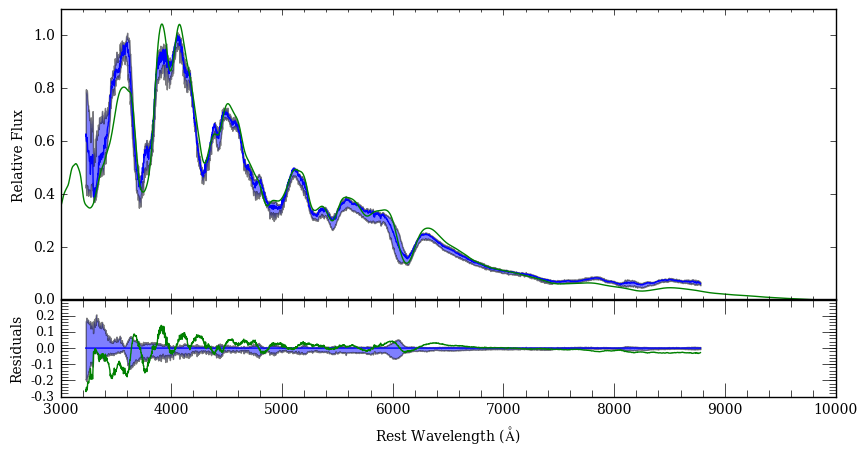

In [190]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]])

In [191]:
comp = composites_m2[0]

true_Bflux = B.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
true_Bmag = -2.5 * np.log10(true_Bflux) - B.Vega_zero_mag

true_Vflux = V.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
true_Vmag = -2.5 * np.log10(true_Vflux) - V.Vega_zero_mag

true_Rflux = R.get_flux(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], axis = -1)
true_Rmag = -2.5 * np.log10(true_Rflux) - R.Vega_zero_mag

In [192]:
true_BmV = true_Bmag - true_Vmag
true_VmR = true_Vmag - true_Rmag

In [194]:
best_knots = opt.minimize(color_residuals, spline_knot_vals, args = (true_BmV, true_VmR, hsiao_max), method = 'Nelder-Mead').x
print best_knots

[ 1.00000001  1.          1.        ]
[ 1.05000001  1.          1.        ]
[ 1.00000001  1.05        1.        ]
[ 1.00000001  1.          1.05      ]
[ 0.95000001  1.03333333  1.03333333]
[ 0.96666668  1.05555556  0.97222222]
[ 0.99166668  1.01388889  1.03055556]
[ 1.04444445  1.00925926  0.98703704]
[ 0.97361112  1.02731481  1.02175926]
[ 0.97685186  0.97746914  1.03487654]
[ 0.99421297  1.03186728  1.00871914]
[ 0.97299384  1.04871399  1.0406893 ]
[ 0.99324847  1.0121785   1.01017233]
[ 0.9823817   1.03368484  0.99654492]
[ 0.98934543  1.01883788  1.0220529 ]
[ 1.01092679  1.01460762  1.00553698]
[ 0.98294004  1.02413802  1.01770369]
[ 0.98280965  1.00490231  1.02456681]
[ 0.99136214  1.02512604  1.01268105]
[ 0.98251661  1.03322279  1.0247861 ]
[ 0.9905655   1.01743957  1.01382577]
[ 0.98723302  1.02563121  1.00742078]
[ 0.98881733  1.02053621  1.01839487]
[ 0.99755661  1.01792986  1.01223077]
[ 0.98659418  1.02258598  1.01633546]
[ 0.9872836   1.02805925  1.01778182]
[ 0.98974503

In [195]:
best_spline = inter.splrep(spline_knot_locs, best_knots, k=2)
best_spline_func = inter.splev(hsiao_max[0], best_spline, ext = 0)

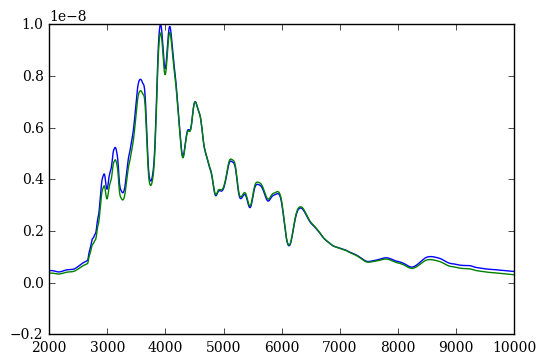

In [196]:
warped_hsiao = best_spline_func*hsiao_max[1]
plt.plot(hsiao_max[0], hsiao_max[1])
plt.plot(hsiao_max[0], warped_hsiao)
plt.xlim([2000,10000])
plt.show()

In [197]:
wave_h = hsiao_max[0]
flux_h = warped_hsiao
wave_interp_h = np.arange(1000., 12000., dtype=int, step=2)
flux_spl_h = inter.splrep(wave_h, flux_h)
flux_interp_h = inter.splev(wave_interp_h, flux_spl_h, ext = 3)
h_template = composite.supernova(wave_interp_h, flux_interp_h)
h_template.phase_array = np.zeros(len(flux_interp_h))

In [199]:
comps_and_temps = []
for comp in composites_m2:
    comps_and_temps.append(comp)
comps_and_temps.append(h_template)
comps_and_temps, scales = composite.optimize_scales(comps_and_temps, comps_and_temps[0], True)

[-0.2, -0.15000000000000002, -0.1, -0.04999999999999999, 0.0, 0.04999999999999999, 0.10000000000000003, '', 0.2]


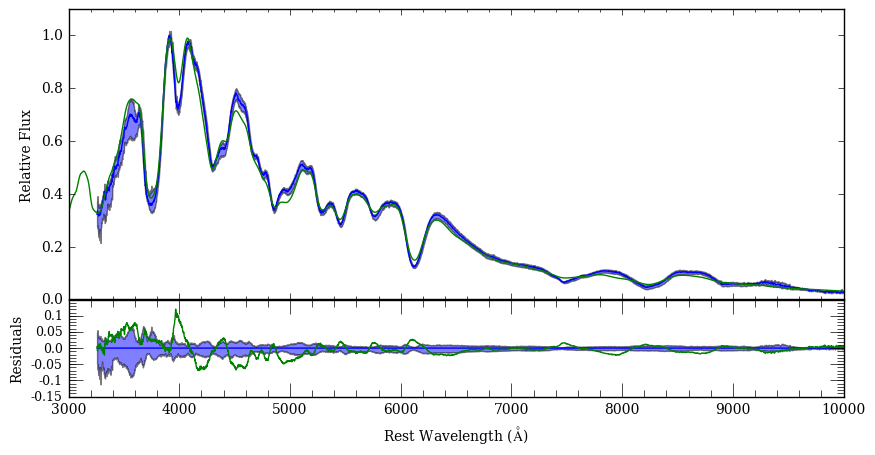

In [200]:
query_db.scaled_plot([comps_and_temps[0], comps_and_temps[1]])